## 1. Necessary Packages

In [ ]:
!pip install matplotlib

In [1]:
import sys
import os 

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# %matplotlib.inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('fer2013/fer2013.csv')

## 2. Pre Setup and Visualizing

**Kaggle Dataset Description:**

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

In [3]:
df.shape

(35887, 3)

In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
type(df['pixels'][0])

str

In [6]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

we could use about 28,709 images for training

In [10]:
# Lets split into train, validation and test
# Also converting the pixel values to float32 for tensor processing them later

xtrain, ytrain, xval, yval, xtest, ytest = [],[],[],[],[],[]

for i, row in df.iterrows():
    value = row['pixels'].split(' ')
    if row['Usage'] == 'Training':
        xtrain.append(np.array(value, 'float32'))
        ytrain.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        xtest.append(np.array(value, 'float32'))
        ytest.append(row['emotion'])
    else:
        xval.append(np.array(value, 'float32'))
        yval.append(row['emotion'])

In [11]:
# Verifying the size of the arrays
print(len(xtrain),len(xval),len(xtest),len(ytrain),len(yval),len(ytest))

28709 3589 3589 28709 3589 3589


In [12]:
xtrain[0]

array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32)

In [13]:
# Converting the lists to np arrays

xtrain = np.array(xtrain,'float32')
ytrain = np.array(ytrain,'float32')

xval = np.array(xval,'float32')
yval = np.array(yval,'float32')

xtest = np.array(xtest,'float32')
ytest = np.array(ytest,'float32')

## 3. Lets Visualize the Data

In [14]:
classes  = {
    0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'
}

In [15]:
# Testing image 0
train_image_0 = xtrain[0].reshape(48,48)
train_image_0_label = classes[int(ytrain[0])]

print(train_image_0.shape)
print(f'train_image_0_label = {ytrain[0]} = {train_image_0_label}')

(48, 48)
train_image_0_label = 0.0 = Angry


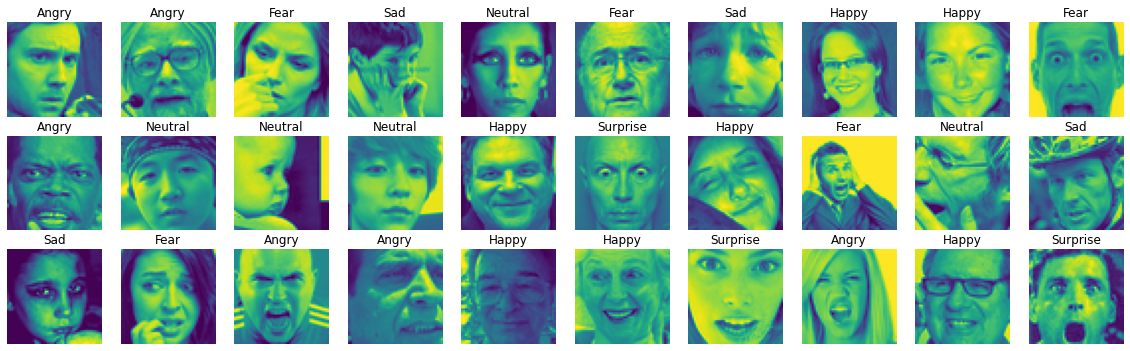

In [16]:
# Lets display 16 images from the dataset
ncols = 10
nrows = 4

fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)


for i in range(30):
    # set up subplot, note idicies start from 1
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img = xtrain[i].reshape(48,48)
    plt.title(classes[int(ytrain[i])])
    plt.imshow(img)
    
plt.show() 

## 4. Preprocessing the Data

In [17]:
# Normalizing the Data (converting data in range 0 to 1)
xtrain/=255
xval/=255
xtest/=255

In [18]:
# viewing the normalized data
xtrain[0]

array([0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
       0.32156864], dtype=float32)

In [19]:
# Parameters
image_height = 48
image_width = 48
num_channels = 1

In [20]:
xtrain = xtrain.reshape(xtrain.shape[0],image_height,image_width,num_channels)
xtest = xtest.reshape(xtest.shape[0],image_height,image_width,num_channels)
xval = xval.reshape(xval.shape[0],image_height,image_width,num_channels)

In [21]:
from keras.utils import to_categorical

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
ytest = to_categorical(ytest)

## 5. Model Building 

In [23]:
# Parameters
nlabels = 7
batch_size = 64
epochs = 30

In [ ]:
# Model Building 
model = Sequential()

# block 1
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(image_height,image_width,num_channels)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Dropout(0.5))


# block 2
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(image_height,image_width,num_channels)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Dropout(0.5))

# block 2
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(image_height,image_width,num_channels)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(nlabels))

model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])

In [ ]:
# Train the model 
model.fit(
    xtrain,ytrain,
    epochs = epochs,
    verbose = 1,
    validation_data = (xval,yval),
    shuffle = True
         )